In [6]:
#imports
from __future__ import print_function
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,BatchNormalization,LocallyConnected2D,Dropout
from keras import regularizers
%matplotlib inline

In [7]:
#making model
model=Sequential()
inputShape=(28,28,1)
#Conv2D did not accept(784,-1),(784,testcases) as an input shape
model.add(BatchNormalization())
model.add(Conv2D(32,kernel_size=(5,5),activation='relu',input_shape=inputShape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.3))#first dropout
model.add(Conv2D(32,kernel_size=(5,5),activation='sigmoid',input_shape=inputShape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.2))#lesser than 0.3
model.add(LocallyConnected2D(64, (3, 3), input_shape=inputShape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(rate=0.1))#lesser than 0.2
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(10,activation='softmax',kernel_initializer='random_uniform'))
model.add(BatchNormalization())
model.add(Dense(10,activation='softmax',kernel_initializer='random_uniform'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False),
              metrics=['accuracy'])

Train on 21001 samples, validate on 21000 samples
Epoch 1/5
21001/21001 [==============================] - 29s 1ms/step - loss: 1.6603 - acc: 0.6515 - val_loss: 0.8383 - val_acc: 0.8910
Epoch 2/5
21001/21001 [==============================] - 29s 1ms/step - loss: 0.6402 - acc: 0.9493 - val_loss: 0.2722 - val_acc: 0.9768
Epoch 3/5
21001/21001 [==============================] - 35s 2ms/step - loss: 0.2574 - acc: 0.9753 - val_loss: 0.1576 - val_acc: 0.9809
Epoch 4/5
21001/21001 [==============================] - 39s 2ms/step - loss: 0.1426 - acc: 0.9821 - val_loss: 0.0958 - val_acc: 0.9869
Epoch 5/5
21001/21001 [==============================] - 39s 2ms/step - loss: 0.0958 - acc: 0.9854 - val_loss: 0.0684 - val_acc: 0.9869
Train on 21000 samples, validate on 21001 samples
Epoch 1/6
21000/21000 [==============================] - 49s 2ms/step - loss: 0.0896 - acc: 0.9825 - val_loss: 0.0476 - val_acc: 0.9922
Epoch 2/6
21000/21000 [==============================] - 49s 2ms/step - loss: 0.0701

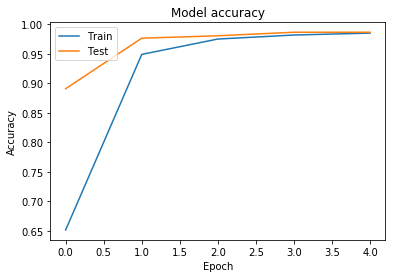

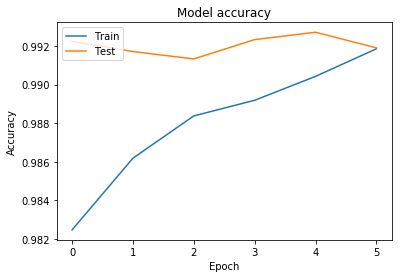

Train on 21001 samples, validate on 21000 samples
Epoch 1/3
21001/21001 [==============================] - 66s 3ms/step - loss: 0.0470 - acc: 0.9880 - val_loss: 0.0193 - val_acc: 0.9953
Epoch 2/3
21001/21001 [==============================] - 54s 3ms/step - loss: 0.0384 - acc: 0.9900 - val_loss: 0.0201 - val_acc: 0.9947
Epoch 3/3
21001/21001 [==============================] - 52s 2ms/step - loss: 0.0323 - acc: 0.9915 - val_loss: 0.0244 - val_acc: 0.9932
Train on 21000 samples, validate on 21001 samples
Epoch 1/4
21000/21000 [==============================] - 43s 2ms/step - loss: 0.0342 - acc: 0.9910 - val_loss: 0.0158 - val_acc: 0.9958
Epoch 2/4
21000/21000 [==============================] - 37s 2ms/step - loss: 0.0271 - acc: 0.9926 - val_loss: 0.0177 - val_acc: 0.9952
Epoch 3/4
21000/21000 [==============================] - 45s 2ms/step - loss: 0.0240 - acc: 0.9938 - val_loss: 0.0159 - val_acc: 0.9952
Epoch 4/4
21000/21000 [==============================] - 36s 2ms/step - loss: 0.0225

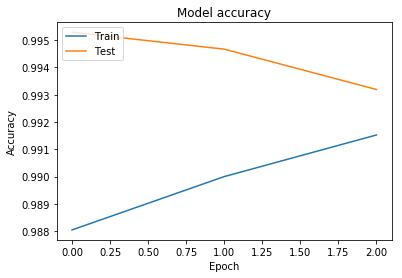

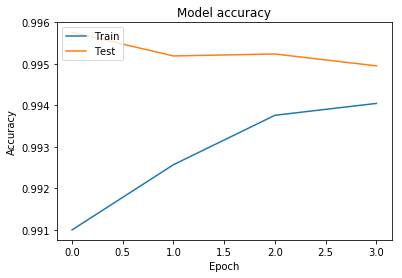

Train on 21001 samples, validate on 21000 samples
Epoch 1/1
21001/21001 [==============================] - 38s 2ms/step - loss: 0.0336 - acc: 0.9901 - val_loss: 0.0088 - val_acc: 0.9975
Train on 21000 samples, validate on 21001 samples
Epoch 1/2
21000/21000 [==============================] - 39s 2ms/step - loss: 0.0272 - acc: 0.9922 - val_loss: 0.0130 - val_acc: 0.9960
Epoch 2/2
21000/21000 [==============================] - 42s 2ms/step - loss: 0.0218 - acc: 0.9940 - val_loss: 0.0136 - val_acc: 0.9962


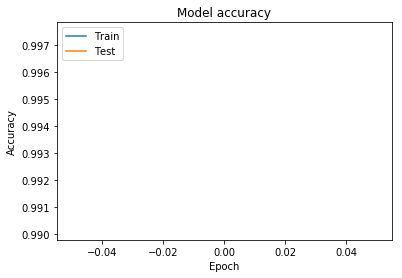

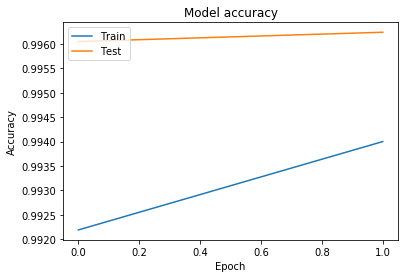

In [8]:
#making dataloader,
# this was mainly to convert pandas dataframe to numpy array
# keras inbuilt functionality and reshape functionality are
# available for numpy.

import pandas as pd
def MnistLoadData(X,Y,frac):
    lenx=len(X)
    lenY=len(Y)
    #splitting input data to test and train
    x1=X.loc[0:lenx*frac]
    x2=X.loc[lenx*(1-frac):lenx]
    y1=Y.loc[0:lenY*frac]
    y2=Y.loc[lenY*(1-frac):lenY]
    #converting pandas datafram to numpy
    #for performing reshape and using 
    #to_categorical functions of keras
    x1=x1.to_numpy()
    x2=x2.to_numpy()
    y1=y1.to_numpy()
    y2=y2.to_numpy()
    x1=x1.reshape(x1.shape[0],28,28,1)
    x2=x2.reshape(x2.shape[0],28,28,1)
    #one hot encoding functionality of keras
    #converts y to its corresponding probablity array
    #1=[1,0,0,0,0,0,0,0...]
    #2=[0,1,0,0,0,0,0,....]
    y1=keras.utils.to_categorical(y1,10)
    y2=keras.utils.to_categorical(y2,10)
    return (x1,y1),(x2,y2)

#reading dataset
dataset=pd.read_csv('dataset/digit-recognizer/train.csv')
X=dataset.drop('label',axis=1)
Y=dataset['label']

#loading data
(x1,y1),(x2,y2)=MnistLoadData(X,Y,.5)
#making model, here neural net extracts characteristic weights for this dataset
#so that it can make predictions
itrates=3
for i in range(itrates):
    epochs1=int(5*(3-i)/3)
    epochs2=int(6*(3-i)/3)
    #successively reduce the number of epochs
    history1=model.fit(x1,y1,batch_size=128,epochs=epochs1,validation_data=(x2,y2))#epoch is set at 9 because that is where inflection happens in acc
    history2=model.fit(x2,y2,batch_size=128,epochs=epochs2,validation_data=(x1,y1))

    import matplotlib.pyplot as plt
    # Plot training & validation accuracy values
    plt.plot(history1.history['acc'])
    plt.plot(history1.history['val_acc'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()


    plt.plot(history2.history['acc'])
    plt.plot(history2.history['val_acc'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

In [9]:
#check using the second half of the dataset, how accurate the prediction is
acc=model.evaluate(x2,y2,verbose=1)
print(acc)
#loading data from csv for predictions
#xtest need not be seperated since it only has input vector
Xtest=pd.read_csv('dataset/digit-recognizer/test.csv')
Xtest=Xtest.to_numpy()
Xtest=Xtest.reshape(Xtest.shape[0],28,28,1)
Ytest=model.predict(Xtest)

21000/21000 [==============================] - 9s 412us/step
[0.00568925455212593, 0.9990476190476191]


In [10]:
#making the submission file
from numpy import argmax
import numpy as np
Yarray=[]
i=1
Yarray.append(("ImageId","Label"))
for nu in Ytest:
    Yarray.append((i,int(argmax(nu))))
    i=i+1

np.savetxt("dataset/digit-recognizer/submission.csv",np.asarray(Yarray),delimiter=",",fmt="%s")